In [1]:
import numpy as np
import cv2
import random
import matplotlib.pylab as plt
!pip install opencv-python
def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")        

# 1. 카툰 영상 생성

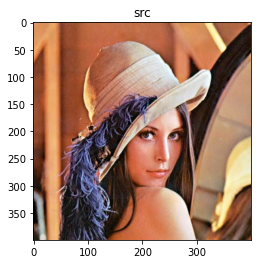

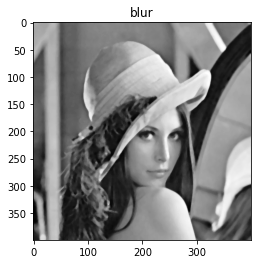

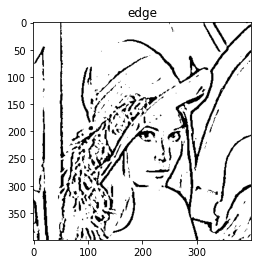

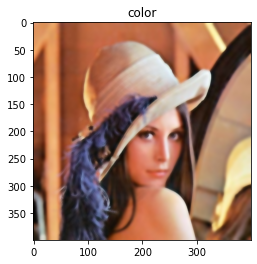

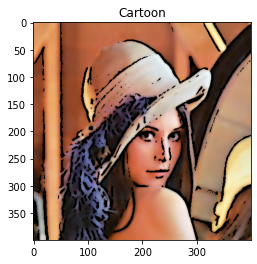

In [2]:
img = cv2.imread("lenna.jpg")

# 1) Edges
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.medianBlur(gray, 5)
edge = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
#_, edge = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)



color = cv2.bilateralFilter(img, 9, 300, 300)
#엣지를 보존하면서 블러링하는 필터입니다.
cartoon = cv2.bitwise_and(color, color, mask=edge) 
#255인부분만 and를 해줍니다. 0인 부분은 0이 되는 것입니다. 

imshow("src", img); plt.show()
imshow("blur", blur); plt.show()
imshow("edge", edge); plt.show()
imshow("color", color); plt.show()
imshow("Cartoon", cartoon); plt.show()

# 2. 크로마키 영상

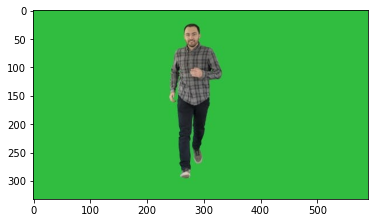

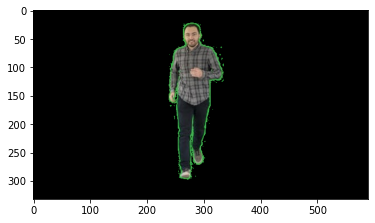

In [3]:
img = cv2.imread('chromakey.jpg')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

height, width, _ = img.shape

imshow("", img); plt.show()
    
for h in range(0, height):
        for w in range(0, width):
            b = img[h, w, 0]
            g = img[h, w, 1]
            r = img[h, w, 2]    
            
            if ( b > 50 and b < 70) and ( g > 150 and g < 200) and ( r > 30 and r < 60)   :
                img[h, w, :] = 0                
                
imshow("", img)

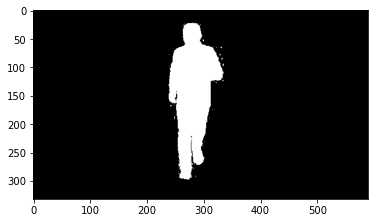

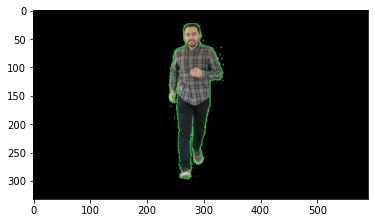

In [4]:
img = cv2.imread('chromakey.jpg')


lower_chroma = (50, 150, 30)
upper_chroma = (70, 200, 60)

green = 255 - cv2.inRange(img, lower_chroma, upper_chroma)

dst = cv2.bitwise_and(img, img, mask=green)  


imshow("", green); plt.show()
imshow("", dst); plt.show()

# 3. 신호등 인식

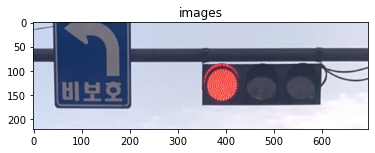

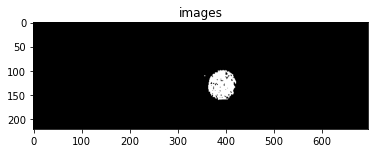

In [5]:
frame = cv2.imread("sign.jpeg")
lower = np.array([0, 48, 0], dtype = "uint8")
upper = np.array([5, 255, 255], dtype = "uint8")

converted = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(converted, lower, upper)


imshow("images", frame) ; plt.show()
imshow("images", mask) ;plt.show()

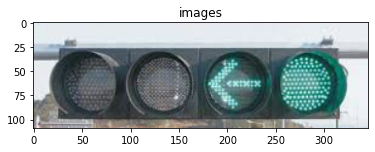

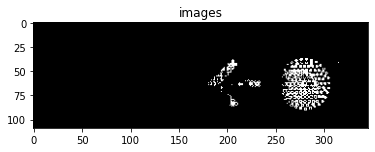

In [6]:
frame = cv2.imread("sign2.png")
lower = np.array([40, 90, 150], dtype = "uint8")
upper = np.array([110, 255, 255], dtype = "uint8")

converted = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(converted, lower, upper)


imshow("images", frame) ; plt.show()
imshow("images", mask) ;plt.show()

# 4. 피부색 추출  
before, after를 확실하게 해주기 위해여 
- **hstack** : 수평으로 영상 붙이기
- **vstack** : 수직으로 영상 붙이기

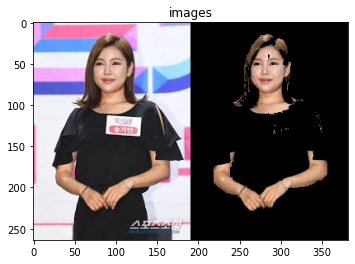

In [7]:
frame = cv2.imread("people.jpg")
lower = np.array([0, 48, 80], dtype = "uint8")
upper = np.array([20, 255, 255], dtype = "uint8")

converted = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
skinMask = cv2.inRange(converted, lower, upper)

skin = cv2.bitwise_and(frame, frame, mask = skinMask)
imshow("images", np.hstack([frame, skin])) 

# 5. 색강조  
dstack은 채널을 더합니다. 그래서 3채널 그레이를 만들어 줄 수 있죠.

In [8]:
src = cv2.imread("yellow.jpg")
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

out = np.dstack([gray, gray, gray])

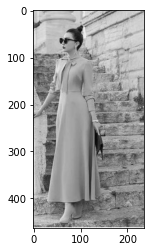

In [9]:
imshow("", out)

uint8


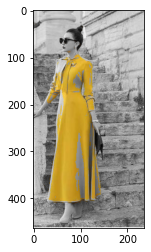

In [10]:
for r in range(src.shape[0]) :
    for c in range(src.shape[1]) :
        col = hsv[r,c, :]
        if col[0] > 10 and col[0] < 50 and  col[1] > 170 and col[1] < 230  : 
            out[r,c,:] = src[r,c,:]   
            
imshow("", src)   
imshow("", out)   
print(src.dtype)

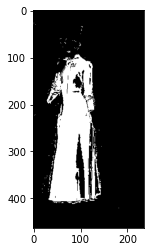

In [11]:
src = cv2.imread("yellow.jpg")

hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

lower = np.array([10, 170, 0], dtype = "uint8")
upper = np.array([50, 230, 255], dtype = "uint8")

skinMask = cv2.inRange(hsv, lower, upper)
imshow("", skinMask)

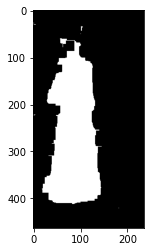

In [12]:
mask= cv2.morphologyEx(skinMask, cv2.MORPH_CLOSE, None,iterations=7)
imshow("", mask)

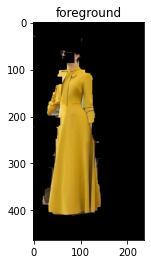

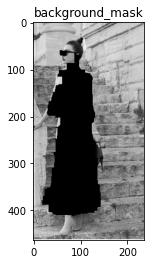

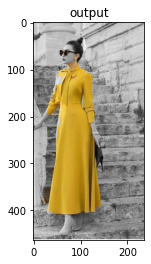

In [13]:
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

gray_3 = np.dstack([gray, gray, gray])



foreground = cv2.bitwise_and(src, src, mask=mask) 
background_mask = cv2.bitwise_or(foreground, gray_3, mask=255-mask)  
output = cv2.bitwise_or(foreground, background_mask)              
#더하는것처럼 or연산을 한다.
imshow("foreground", foreground); plt.show()
imshow("background_mask", background_mask); plt.show()
imshow("output", output) ;plt.show()

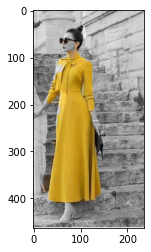

In [14]:
output2 = foreground + background_mask
imshow("", output2)

# 6. 배경합성

In [15]:
img = cv2.imread("chroma.jpg")
background = cv2.resize(cv2.imread("beach.jpg"), (img.shape[1], img.shape[0]))

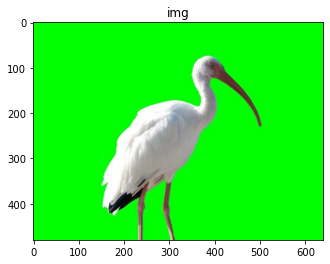

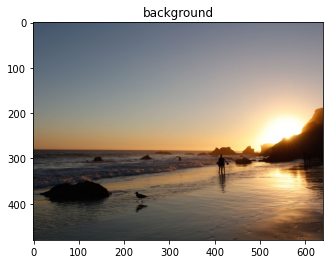

In [16]:
imshow("img", img); plt.show()
imshow("background", background); plt.show()

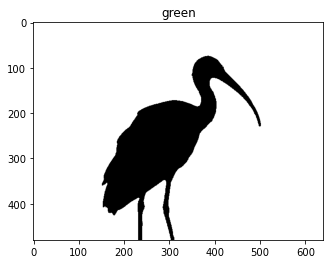

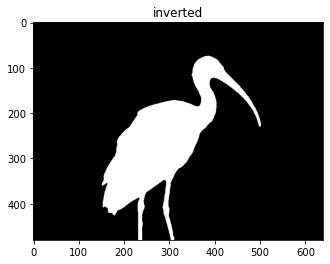

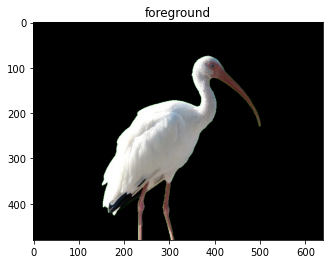

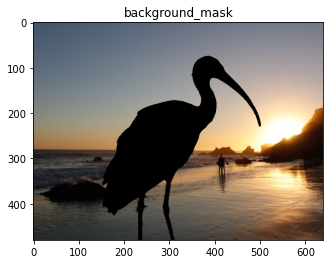

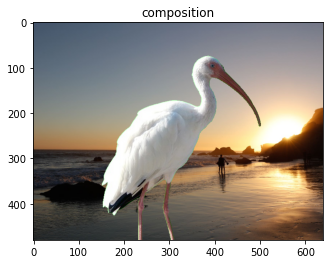

In [17]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#이 범위에 해당하면 255
lower_chroma = (60-10, 100, 100)
upper_chroma = (60+10, 255, 255)

green = cv2.inRange(img_hsv, lower_chroma, upper_chroma)

inverted = cv2.bitwise_not(green) 

#오브젝트만 추출
foreground = cv2.bitwise_and(img, img, mask=inverted)  

#or연산하면  255인 부분만 0 이된다. 
background_mask = cv2.bitwise_or(foreground, background, mask=green)   

#단순히 두개를 or로 하면 연산이 빠르게 됩니다.
composition = cv2.bitwise_or(foreground, background_mask )           

imshow("green", green); plt.show()
imshow("inverted", inverted); plt.show()
imshow("foreground", foreground) ; plt.show()
imshow("background_mask", background_mask) ; plt.show()
imshow("composition", composition) ; plt.show()

#  7. 바둑돌 구분

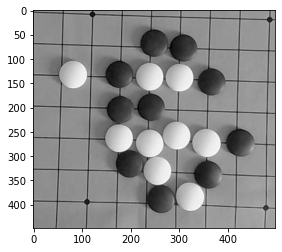

In [18]:
img = cv2.imread('stone.png', 0)
imshow("", img)

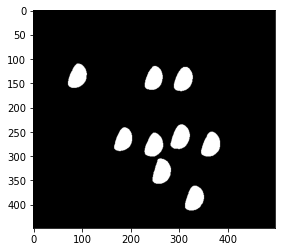

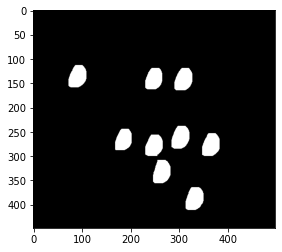

In [19]:
gray = cv2.GaussianBlur(img, (13, 13), 0)
_,binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

white = cv2.morphologyEx(binary, cv2.MORPH_OPEN, None,iterations=7)
white = cv2.morphologyEx(white, cv2.MORPH_CLOSE, None,iterations=5)

imshow("", binary); plt.show()
imshow("", white ); plt.show()

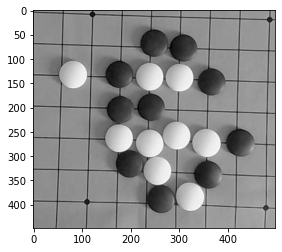

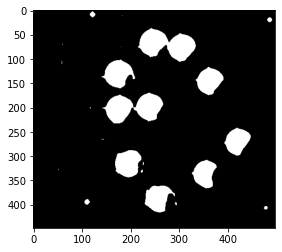

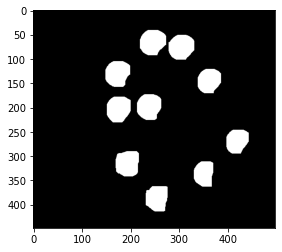

In [20]:
img = cv2.imread('stone.png', 0)

gray = cv2.GaussianBlur(img, (13, 13), 0)
_,binary = cv2.threshold(gray, 80, 255, cv2.THRESH_BINARY_INV)

black = cv2.morphologyEx(binary, cv2.MORPH_OPEN, None,iterations=9)

imshow("", img); plt.show()
imshow("", binary) ; plt.show() 
imshow("", black ) ; plt.show() 

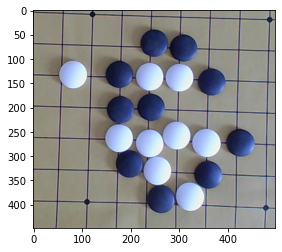

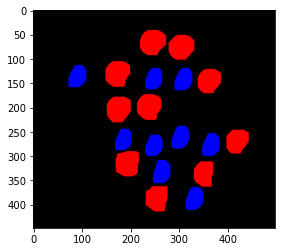

In [21]:
img = cv2.imread('stone.png', 1)

mask = img.copy()

mask[:,:, 0] = white    # blue
mask[:,:, 1] =  0
mask[:,:, 2] = black    # red

imshow("", img); plt.show()
imshow("", mask)

# 7주차 과제

In [22]:
img = cv2.imread("chroma.jpg")
background = cv2.resize(cv2.imread("beach.jpg"), (img.shape[1], img.shape[0]))

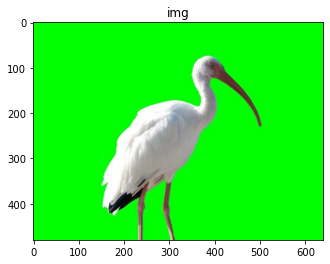

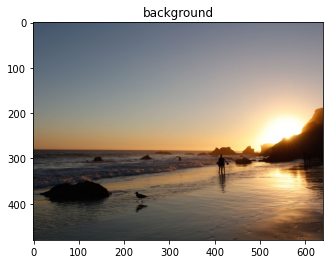

In [23]:
imshow("img", img); plt.show()
imshow("background", background); plt.show()

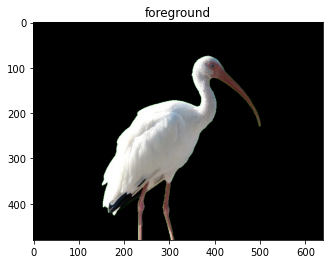

In [25]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#이 범위에 해당하면 255
lower_chroma = (60-10, 100, 100)
upper_chroma = (60+10, 255, 255)

green = cv2.inRange(img_hsv, lower_chroma, upper_chroma)

inverted = cv2.bitwise_not(green) 

#오브젝트만 추출
foreground = cv2.bitwise_and(img, img, mask=inverted)  

imshow("foreground", foreground) ; plt.show()

배경 영상을 3채널 그레이스케일으로 변환해 줍니다.

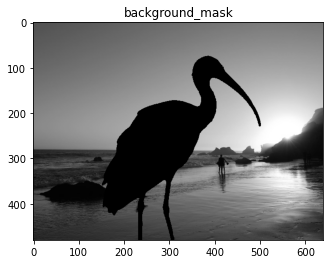

In [29]:
gray = cv2.cvtColor(background, cv2.COLOR_BGR2GRAY)
out = np.dstack([gray, gray, gray])
background_mask = cv2.bitwise_or(foreground, out, mask=green) 
imshow("background_mask", background_mask) ; plt.show()


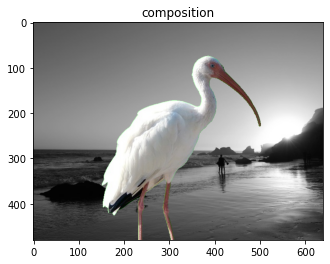

In [30]:
composition = cv2.bitwise_or(foreground, background_mask ) 
imshow("composition", composition) ; plt.show()

In [ ]:
img = cv2.imread("chroma.jpg")
background = cv2.resize(cv2.imread("beach.jpg"), (img.shape[1], img.shape[0]))

